# LOW CODE ASSIGNMENTS PART 2

## **Pycaret: Classification**

### **Multi Class Classification**

#### Installing required libraries

In [ ]:
!pip install pycaret
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

<br>
<br>
<br>

### **Downloading the dataset and participating in the contest**

In [ ]:
!chmod 600 /root/.config/kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip

 85% 13.0M/15.3M [00:01<00:00, 13.9MB/s]
100% 15.3M/15.3M [00:01<00:00, 8.54MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### **Loading required libraries**

In [ ]:
import numpy as np
import pandas as pd

<br>
<br>
<br>


### **Loading the MNIST dataset**

In [ ]:
print("Loading Kaggle MNIST dataset...")
train_data = pd.read_csv('train.csv', nrows=700)
test_data = pd.read_csv('test.csv', nrows=300)

Loading Kaggle MNIST dataset...


### **Setting up Pycaret**

In [ ]:
from pycaret.classification import *
clf1 = setup(data=train_data, target='label', session_id=42)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(700, 785)"
4,Transformed data shape,"(700, 785)"
5,Transformed train set shape,"(489, 785)"
6,Transformed test set shape,"(211, 785)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


#### Comparing the baseline models and saving the best one

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8569,0.9835,0.8569,0.8790,0.8510,0.8408,0.8439,0.6220
rf,Random Forest Classifier,0.8406,0.9810,0.8406,0.8657,0.8350,0.8227,0.8262,0.5960
lightgbm,Light Gradient Boosting Machine,0.8364,0.9768,0.8364,0.8664,0.8324,0.8179,0.8215,11.5600
lr,Logistic Regression,0.8036,0.0000,0.8036,0.8236,0.7968,0.7815,0.7849,0.6740
svm,SVM - Linear Kernel,0.7998,0.0000,0.7998,0.8247,0.7894,0.7774,0.7816,0.2550
xgboost,Extreme Gradient Boosting,0.7975,0.9716,0.7975,0.8223,0.7924,0.7748,0.7783,3.6690
knn,K Neighbors Classifier,0.7832,0.9572,0.7832,0.8181,0.7777,0.7590,0.7638,0.2670
gbc,Gradient Boosting Classifier,0.7649,0.0000,0.7649,0.7944,0.7592,0.7383,0.7424,18.1560
nb,Naive Bayes,0.6278,0.8460,0.6278,0.6677,0.6238,0.5861,0.5910,0.3500
dt,Decision Tree Classifier,0.5603,0.7561,0.5603,0.5925,0.5541,0.5111,0.5153,0.2030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### **Visualizations**

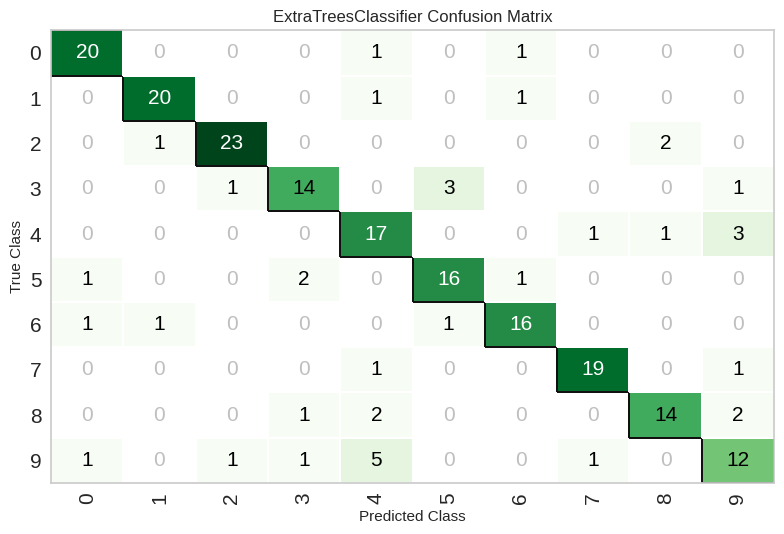

In [ ]:
plot_model(best, plot = 'confusion_matrix')

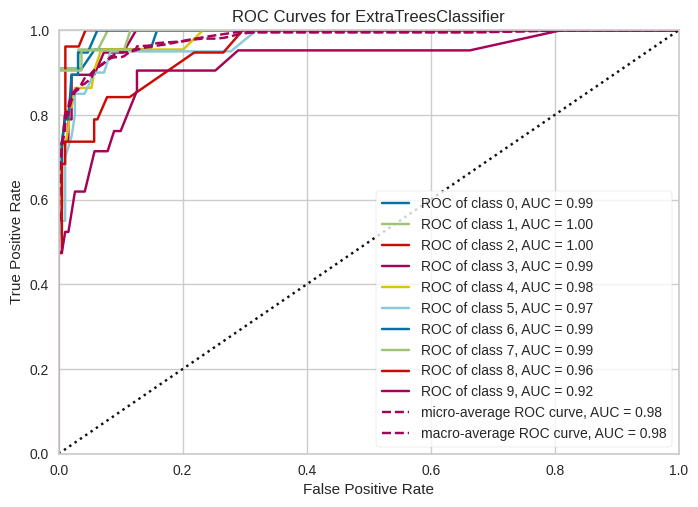

In [ ]:
plot_model(best, plot = 'auc')

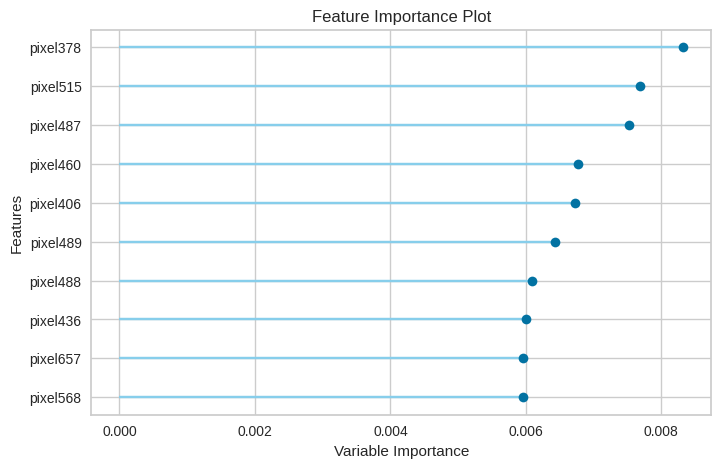

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Checking the accuracy by predicting on the test dataset**

In [ ]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8104,0.9799,0.8104,0.8132,0.8106,0.7891,0.7895


In [ ]:
holdout_pred.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,prediction_label,prediction_score
683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.98
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,7,0.86
693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,6,0.60
620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,7,0.72
684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,6,0.69


In [ ]:
# copy data and drop label variable
new_data = train_data.copy()
new_data.drop('label', axis=1, inplace=True)
new_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,prediction_label,prediction_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.85
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.00
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1.00
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.99
